## DO NOT RUN THIS NOTEBOOK IF THE TRAIN AND VALIDATION DIRECTORIES ARE PRESENT

In [1]:
# pip install tensorflow
# pip install torchxrayvision
# pip install imutils

In [1]:
#Importing Relevant Libraries
import tensorflow as tf 
import numpy as np
import pandas as pd
import torchxrayvision as xrv
import skimage
import torchvision
import matplotlib.pyplot as plt
from imutils import paths

In [2]:
d = xrv.datasets.COVID19_Dataset(imgpath="covid-chestxray-dataset/images/",csvpath="covid-chestxray-dataset/metadata.csv")

In [3]:
labels = pd.DataFrame(
    data=d.labels,
    columns=d.pathologies
            )

In [4]:
label_covid = labels[['COVID-19']]


In [5]:
images = []

for _ in range(len(d)):
    images.append(d[_]['img'][0]) 

In [6]:
#Separating X-rays of patients having covid and not having covid

list_covid_yes = []
list_covid_no = []
image_covid_yes = []
image_covid_no = []

for label in range(len(label_covid)):
    if(label_covid.iloc[label][0]==1.0):
        list_covid_yes.append(label_covid.iloc[label][0])
        image_covid_yes.append(images[label])
        
    else:
        list_covid_no.append(label_covid.iloc[label][0])
        image_covid_no.append(images[label])

In [7]:
image_covid_yes = np.array(image_covid_yes)
image_covid_no = np.array(image_covid_no)

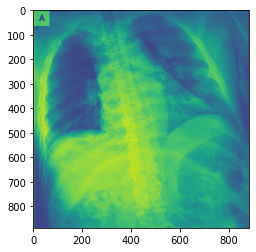

In [55]:
plt.imshow(image_covid_yes[0])

In [50]:
import cv2

In [51]:
count = 0
for i in range(len(image_covid_yes)):
    cv2.imwrite('./Dataset/Covid/'+str(count)+'.png',image_covid_yes[i])
    count+=1
    
count = 0
for i in range(len(image_covid_no)):
    cv2.imwrite('./Dataset/Non-covid/'+str(count)+'.png',image_covid_no[i])
    count+=1


In [53]:
import matplotlib.pyplot as plt

def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [52]:
non_covid_images = list(paths.list_images("Dataset/Non-covid"))
covid_images = list(paths.list_images("Dataset/Covid"))

In [30]:
#Dividing into training and validation set

# X_train_covid_yes = image_covid_yes[:300]
# X_validation_covid_yes = image_covid_yes[300:]
# X_train_covid_no = image_covid_no[:170]
# X_validation_covid_no = image_covid_no[170:]

In [ ]:
#Function to convert images from 2-D to 3-D

def twod_to_threed(image_list):
    for image in range(len(image_list)):
        image_list[image] = image_list[image][:, :, np.newaxis]
    return image_list

In [ ]:
X_train_covid_yes = twod_to_threed(X_train_covid_yes)
X_validation_covid_yes = twod_to_threed(X_validation_covid_yes)
X_train_covid_no = twod_to_threed(X_train_covid_no)
X_validation_covid_no = twod_to_threed(X_validation_covid_no)

In [ ]:
#Function to convert Gray-scale images to RGB

def gs_to_rgb(image_list):
    for original in range(len(image_list)):
        image_list[original] = tf.image.grayscale_to_rgb(tf.convert_to_tensor(image_list[original]))
    return image_list

In [ ]:
#Final set of images ready to be fed to model

X_train_covid_yes = gs_to_rgb(X_train_covid_yes)
X_validation_covid_yes = gs_to_rgb(X_validation_covid_yes)
X_train_covid_no = gs_to_rgb(X_train_covid_no)
X_validation_covid_no = gs_to_rgb(X_validation_covid_no)

In [ ]:
#Save images to train and validation directory

from PIL import Image

def save_image(image_list, path):
    for image in range(len(image_list)):
        Image.fromarray(np.array(image_list[image])).convert('L').save("{}/{}.jpeg".format(path,image))

In [ ]:
save_image(X_train_covid_yes, './Train/Covid')
save_image(X_train_covid_no, './Train/Non-covid')
save_image(X_validation_covid_yes, './Validation/Covid')
save_image(X_validation_covid_no, './Validation/Covid')